In [271]:
## Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

### Q1. Data Exploration and Visualization (20)
Explore Event_entry(in Files) dataset.
Provide visualizations such as histograms, scatter plots, or box plots to understand the distribution of different features.
Include any other plots you find interesting and provide brief interpretations.

In [272]:
## Reading the file
event_entry = pd.read_csv('Event_entry.csv')

## display the top 10 rows
event_entry.head(10)

Entry  TicketClass     Sex   Age  Price  Order  \
0      0            3    male  22.0      7      1   
1      1            1  female  38.0     71      2   
2      1            3  female  26.0      8      3   
3      1            1  female  35.0     53      4   
4      0            3    male  35.0      8      5   
5      0            3    male   NaN      8      6   
6      0            1    male  54.0     52      7   
7      0            3    male   2.0     21      8   
8      1            3  female  27.0     11      9   
9      1            2  female  14.0     30     10   

                                                Name  Ticket Number  \
0                            Braund, Mr. Owen Harris         648155   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...         119239   
2                             Heikkinen, Miss. Laina         411408   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)         530093   
4                           Allen, Mr. William Henry         510583   
5                                   Moran, Mr. James         664358   
6                            McCarthy, Mr. Timothy J         169025   
7                     Palsson, Master. Gosta Leonard         312584   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)         449130   
9                Nasser, Mrs. Nicholas (Adele Achem)         948114   

   Bank Balance  
0         74389  
1         94932  
2         26146  
3         35627  
4         60457  
5         30640  
6         46924  
7         65437  
8         52105  
9         49403

In [273]:
## to understand the structure of the data frame
event_entry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entry          869 non-null    int64  
 1   TicketClass    869 non-null    int64  
 2   Sex            869 non-null    object 
 3   Age            694 non-null    float64
 4   Price          869 non-null    int64  
 5   Order          869 non-null    int64  
 6   Name           869 non-null    object 
 7   Ticket Number  869 non-null    int64  
 8   Bank Balance   869 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 61.2+ KB


In [274]:
## Checking for null values
event_entry.isnull().sum()

Entry              0
TicketClass        0
Sex                0
Age              175
Price              0
Order              0
Name               0
Ticket Number      0
Bank Balance       0
dtype: int64

### Visualizations

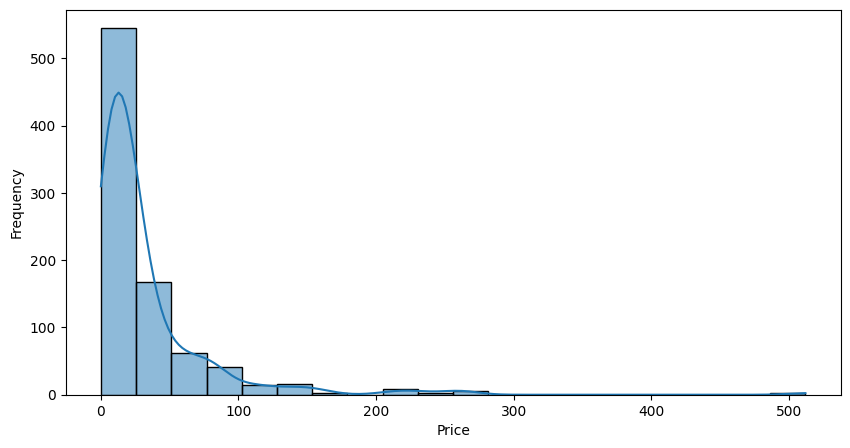

In [275]:
## Histogram
plt.figure(figsize = (10,5))
sns.histplot(event_entry['Price'], bins=20, edgecolor = 'black', kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


##### The histogram suggests that lower prices are common in the dataset. Most of the ticket price range from 0 to 100 dollars.

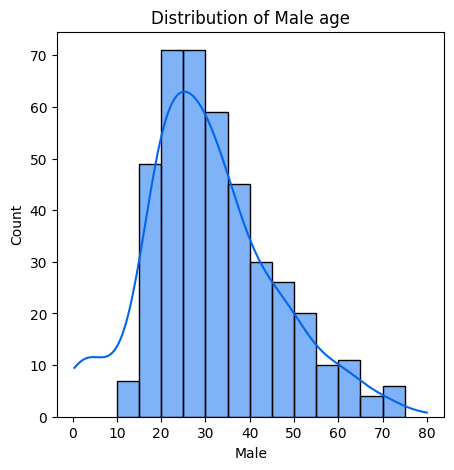

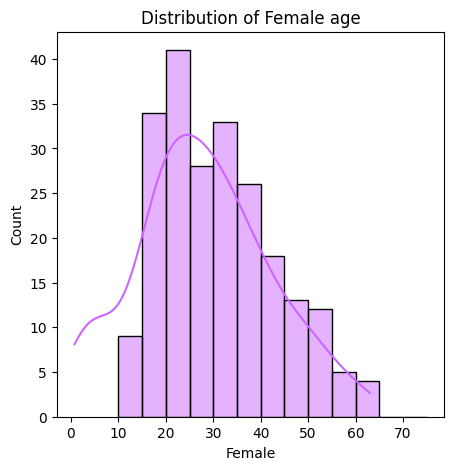

In [276]:
male_age = event_entry[event_entry['Sex'] == 'male']['Age']
female_age = event_entry[event_entry['Sex'] == 'female']['Age']

age_bins = range(10,80,5)

## Histogram of Male
plt.figure(figsize = (5,5))
# plt.subplots(1, 1, figsize=(12,5), sharey=True)
sns.histplot(male_age, bins=age_bins, edgecolor = 'black', kde=True, color = '#0066f0')
plt.xlabel('Male')
plt.ylabel('Count')
plt.title('Distribution of Male age')
plt.show()

## Histogram of Female
plt.figure(figsize = (5,5))
sns.histplot(female_age, bins=age_bins, edgecolor = 'black', kde=True, color = '#cc66ff')
plt.xlabel('Female')
plt.ylabel('Count')
plt.title('Distribution of Female age')
plt.show()

##### The histogram of female age and male age is approximately bell-shaped, indicating a normal distribution with a slight right skew. Majority of females are concentrated in the age range of approximately 20-30 years while age of male range between 20 - 40.

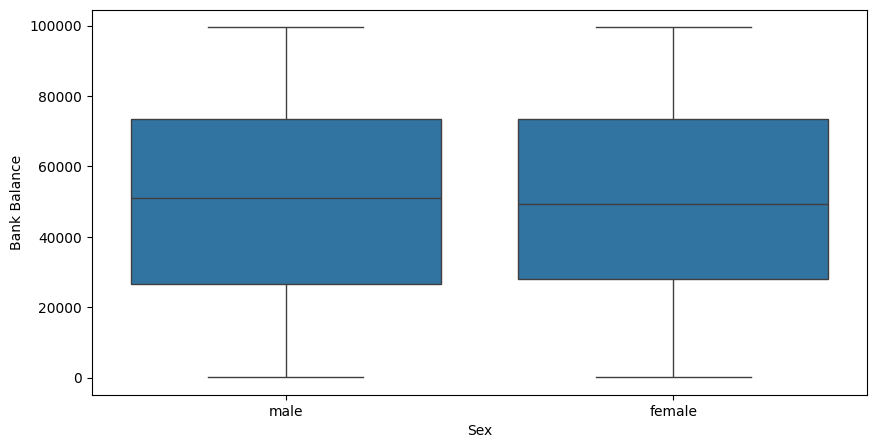

In [278]:
## Box Plot
plt.figure(figsize = (10,5))
sns.boxplot(x='Sex', y = 'Bank Balance', data = event_entry)
plt.xlabel('Sex')
plt.ylabel('Bank Balance')
plt.show()

##### The boxplot depicts the distribution of bank balance between male and female. The median of bank balance between male and female is the same which is around 5000. Also we dont observe any outliers at all.

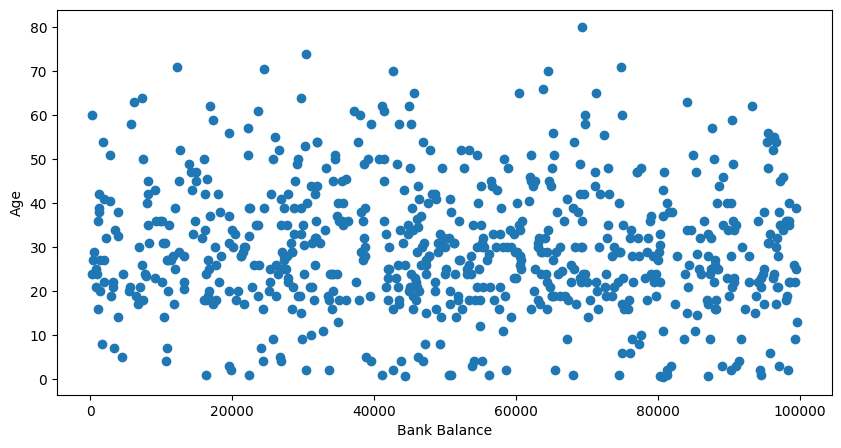

In [279]:
## Scatter Plot
plt.figure(figsize = (10,5))
# event_entry['log_Price'] = np.log(event_entry['Price'])
plt.scatter('Bank Balance', ('Age'), data = event_entry)
plt.xlabel('Bank Balance')
plt.ylabel('Age')
plt.show()

##### From the scatter plot we can conclude that there is no correlation between Bank Balance and Age.

In [280]:
event_entry.iloc[:,[3,8]].corr()
# event_entry.iloc[:, [3, 7]].corr()

Age  Bank Balance
Age           1.000000     -0.074777
Bank Balance -0.074777      1.000000

##### The correlation between bank balance and age is -0.07477 and this proves there is not much of correlation present between the two.

### Q2. PCA Analysis (25)
Split the dataset into training and testing sets and encode the variables if needed.
Develop a Logistic regression model to predict If the entry to the event will be granted on not. (Use at least 6 dimensions)
Use PCA to reduce dimensions, try with 2, 4, and 6 dimensions
Use the above 2,4,6 dimensions to train and test the Logistic Regression Model and evaluate the impact it has on the performance.
Compare the OOS performance with that of a LASSO Logistic Regression Model.
(Tip: Many times, PCA reduces accuracy but the computation is much lighter and that is the tradeoff you can consider while building models in real life)

In [281]:
## Creating dummies 
event_entry_encoded = pd.get_dummies(event_entry['Sex'], prefix = 'Sex')

In [282]:
event_entry = pd.concat([event_entry, event_entry_encoded], axis = 1)
event_entry

Entry  TicketClass     Sex   Age  Price  Order  \
0        0            3    male  22.0      7      1   
1        1            1  female  38.0     71      2   
2        1            3  female  26.0      8      3   
3        1            1  female  35.0     53      4   
4        0            3    male  35.0      8      5   
..     ...          ...     ...   ...    ...    ...   
864      0            2    male  24.0     13    865   
865      1            2  female  42.0     13    866   
866      1            2  female  27.0     14    867   
867      0            1    male  31.0     50    868   
868      0            3    male   NaN     10    869   

                                                  Name  Ticket Number  \
0                              Braund, Mr. Owen Harris         648155   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...         119239   
2                               Heikkinen, Miss. Laina         411408   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)         530093   
4                             Allen, Mr. William Henry         510583   
..                                                 ...            ...   
864                             Gill, Mr. John William         305015   
865                           Bystrom, Mrs. (Karolina)         459167   
866                       Duran y More, Miss. Asuncion         508948   
867               Roebling, Mr. Washington Augustus II         942774   
868                        van Melkebeke, Mr. Philemon         498086   

     Bank Balance  Sex_female  Sex_male  
0           74389       False      True  
1           94932        True     False  
2           26146        True     False  
3           35627        True     False  
4           60457       False      True  
..            ...         ...       ...  
864         87301       False      True  
865         48146        True     False  
866         60741        True     False  
867         19589       False      True  
868         79973       False      True  

[869 rows x 11 columns]

In [283]:
## Assigning 0 and 1 to the dummies 
event_entry['Sex_female'] = np.where(event_entry['Sex_female'] == True, 1,0)
event_entry['Sex_male'] = np.where(event_entry['Sex_male'] == True, 1,0)

## Dropping Sex_male to avoid multicollinearity
event_entry = event_entry.drop('Sex_male', axis = 1)
print(event_entry)

     Entry  TicketClass     Sex   Age  Price  Order  \
0        0            3    male  22.0      7      1   
1        1            1  female  38.0     71      2   
2        1            3  female  26.0      8      3   
3        1            1  female  35.0     53      4   
4        0            3    male  35.0      8      5   
..     ...          ...     ...   ...    ...    ...   
864      0            2    male  24.0     13    865   
865      1            2  female  42.0     13    866   
866      1            2  female  27.0     14    867   
867      0            1    male  31.0     50    868   
868      0            3    male   NaN     10    869   

                                                  Name  Ticket Number  \
0                              Braund, Mr. Owen Harris         648155   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...         119239   
2                               Heikkinen, Miss. Laina         411408   
3         Futrelle, Mrs. Jacques Heath (Lily Ma

In [284]:
## Handling the missing values by replacing them with mean. 
event_entry['Age'] = event_entry['Age'].fillna(event_entry['Age'].mean())

In [285]:
## Setting the X and Y variable
X = event_entry.loc[:, ['TicketClass' , 'Sex_female' , 'Age' , 'Price' ,'Order', 'Bank Balance']]
Y = event_entry['Entry']

## Spliting the dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=1)

In [286]:
## Initialising PCA
pca = PCA()
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

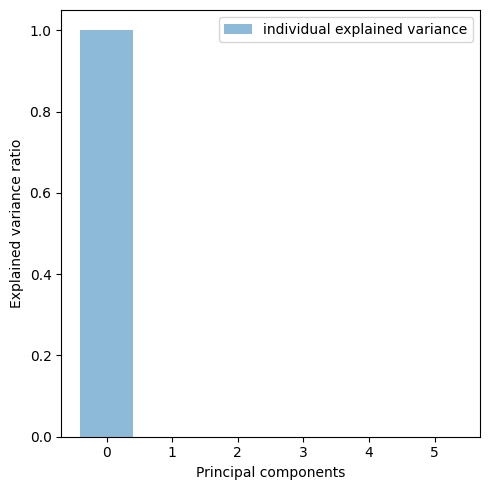

In [293]:
explained_variance=pca.explained_variance_ratio_

## Plotting Bar plot between Principal components and explained variance
plt.figure(figsize=(5, 5))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [247]:
explained_variance[0]+explained_variance[1]

0.9999966295170859

In [294]:
## Defining the function to calculate PCA
def pca(n):
    ## Using Logistic Regression 
    model = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=10000)
    model.fit(X, Y)
    model.fit(X_train_pca[:,:n], y_train)

    ## Predicting the values
    pca_preds=model.predict(X_test_pca[:, :n])

    ## Calculating MSE, R-Squared and Accuracy
    mse = mean_squared_error(y_test,pca_preds)
    print(f'MSE of {n} dimension: {mse:.2f}%')
    
    r2 = r2_score(y_test, pca_preds) 
    print(f'R-squared of {n} dimension: {r2:.2f}')

    # Accuracy Calculation
    accuracy = accuracy_score(y_test, pca_preds) * 100
    print(f'Accuracy of {n} dimension: {accuracy:.2f}%')
    

In [295]:
## PCA for 6 Dimensions
pca(6)

MSE of 6 dimension: 0.24%
R-squared of 6 dimension: 0.05
Accuracy of 6 dimension: 76.44%


In [296]:
## PCA for 4 Dimensions
pca(4)

MSE of 4 dimension: 0.41%
R-squared of 4 dimension: -0.66
Accuracy of 4 dimension: 58.62%


In [297]:
## PCA for 2 Dimensions
pca(2)

MSE of 2 dimension: 0.47%
R-squared of 2 dimension: -0.87
Accuracy of 2 dimension: 53.45%


##### Based on the PCA we can conclude that model with 6 dimension is better since the R-squared value is 0.05, a positive value. Where the R-squared value is negative for other dimensions hence from we will choose a model with 6 dimensions.

### Q3.Decision Tree Analysis (25)
Split the dataset into training and testing sets and encode the variables if needed.
Preprocess the data as necessary (handling missing values, encoding categorical variables, removing unnecessary columns etc.)
Explain the steps clearly that you took in preparing the data and developing the model, feel free to remove unnecessary columns.
Train the decision tree classifier using the training data.
Predict the accuracy of model using test data and explain the results.


In [298]:
# Considering only revelant indepedent variable
X = event_entry.loc[:, ['TicketClass' , 'Sex_female' , 'Age' , 'Price' ,'Order', 'Bank Balance']]

# Dependent Variable
Y = event_entry['Entry']

# splitting dataset into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, random_state=1)

# Missing values and encoding categorical variable are handled previously
## Age had some missing columns and they were replaced using mean age.
## Dummies were created for the categorical variable Age.

## using decision tree
model = tree.DecisionTreeClassifier()

# Training the decision tree
model.fit(X_train, y_train) 

# prediction
predictions = model.predict(X_test)

# Accuracy Score
accuracy = accuracy_score(y_test, predictions) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 71.84%


##### The accuracy of the decision tree model is 71.84% and this is means the model is able to predict the outcome 71.84% of the time. Overall, the decision tree is able to predict well.

### Q4. K Means Clustering(30)
Use the Entry_event database and use the Age and Price columns only (drop all other columns)
Perform K means clustering for different values of K.
Draw a plot and figure out the appropriate value of K, explain in detail the reason for picking K value and the implications.
Create the clusters using the above value of K.
Plot a graph to show the different clusters.
 

In [299]:
## Retaining only Age and Price columns
event_entry_2 = event_entry.copy()
cols_to_drop2 = ['Entry', 'TicketClass', 'Sex', 'Order', 'Name',
       'Ticket Number', 'Bank Balance', 'Sex_female']

In [300]:
## Dropping the all columns except Age and Price
event_entry_2 = event_entry_2.drop(cols_to_drop2, axis = 1)
event_entry_2.columns

Index(['Age', 'Price'], dtype='object')

In [301]:
## Checking for null values
event_entry_2.isnull().sum()

Age      0
Price    0
dtype: int64

In [313]:
## Defining a function for K-means
def kmeans(n):
    # Scale the data
    ms = MinMaxScaler()
    scaled_data = ms.fit_transform(event_entry_2)
    scaled_df = pd.DataFrame(scaled_data, columns=event_entry_2.columns)  # Ensure columns are correctly assigned
    
    # Perform K-Means Clustering
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(scaled_df)
    
    # You might want to attach the cluster labels to your original/scaled DataFrame to analyze the clusters
    scaled_df['Cluster'] = kmeans.labels_
    
    ## Plotting the elbow plot to find the optimum number of clusters required
    cs = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
        kmeans.fit(scaled_df)
        cs.append(kmeans.inertia_)
    plt.plot(range(1, 11), cs)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('CS')
    plt.show()

    ## Calculating the k-means
    kmeans = KMeans(n_clusters=n, random_state=0)
    kmeans.fit(scaled_df)
    
    
    scaled_df['kmeans_cluster'] = kmeans.labels_
    print(scaled_df['kmeans_cluster'].value_counts())
    
    
    scaled_df['kmeans_cluster'] = scaled_df['kmeans_cluster'].astype('category')
    
    # Create the pairplot
    sns.pairplot(scaled_df, hue='Cluster', palette='viridis', corner=True)  # `corner=True` to plot only the lower triangle
    plt.show()

    ## silhouette score
    s = silhouette_score(scaled_df.iloc[:,:4], kmeans.labels_)
    print('silhouette score: ', s)


/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


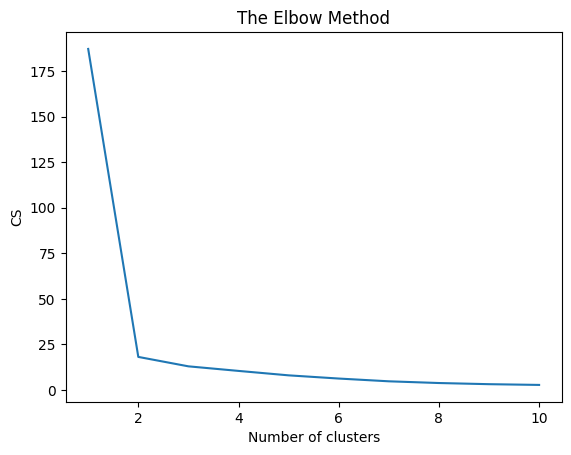

/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


kmeans_cluster
0    666
1    203
Name: count, dtype: int64


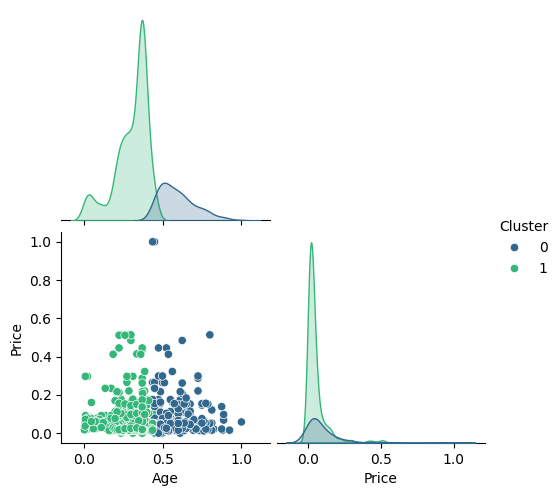

silhouette score:  0.89363419349912


In [311]:
## for 2 clusters calculating th k-means 
kmeans(2)

/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


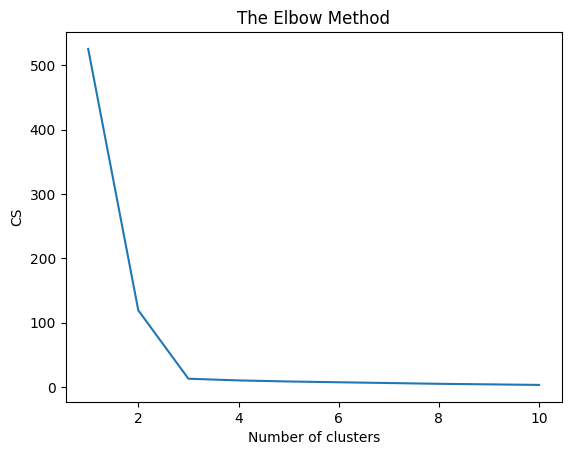

/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


kmeans_cluster
0    497
2    230
1    142
Name: count, dtype: int64


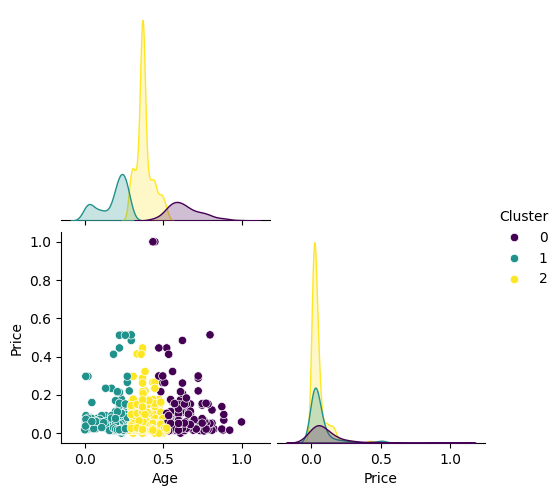

silhouette score:  0.9301963240635374


In [312]:
## for 3 clusters calculating th k-means 
kmeans(3)

/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


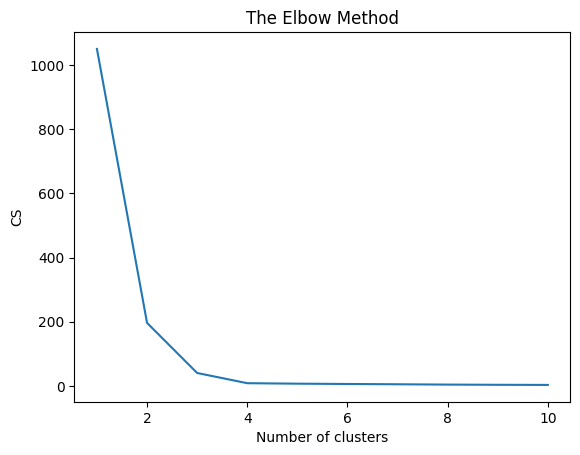

/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


kmeans_cluster
0    483
2    218
1    135
3     33
Name: count, dtype: int64


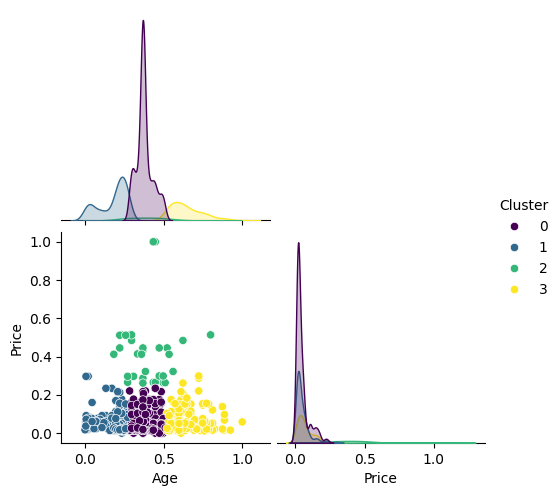

In [314]:
## for 4 clusters calculating th k-means 
kmeans(4)

/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


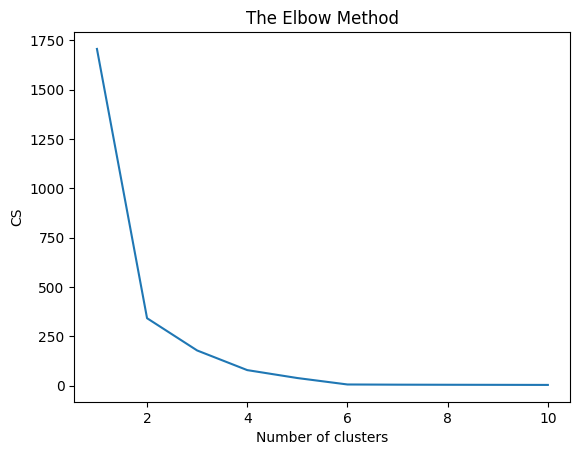

/Users/manickashree/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


kmeans_cluster
0    372
2    214
1    129
3     69
4     55
5     30
Name: count, dtype: int64


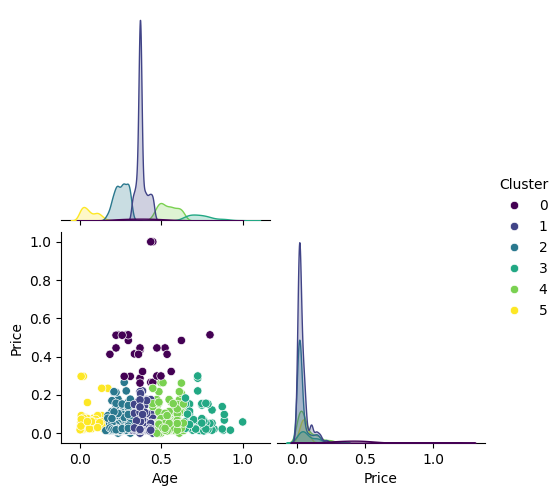

In [315]:
## for 6 clusters calculating th k-means 
kmeans(6)

##### From the elbow plot, we can see that there is noticeable bend at k=3. Hence the optimum number of clusters required are 3 and adding more clusters won't be any significant improvement in the model. Also the Silhouette score for k=3 is 0.9301963240635374 and each data point is well matched to its own cluster and they are distinctly different from other clusters.